In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from prml.clusterings import KMeans
from prml.distributions import GaussianMixtureDistribution

In [2]:
# training data
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
x_train = np.vstack((x1, x2, x3))

x0, x1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
x = np.array([x0, x1]).reshape(2, -1).T

# 9.1 K-means Clustering

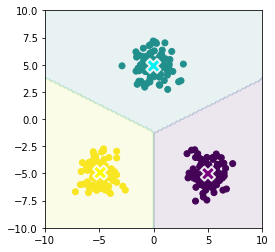

In [3]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
cluster = kmeans.predict(x_train)
plt.scatter(x_train[:, 0], x_train[:, 1], c=cluster)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], s=200, marker='X', lw=2, c=['purple', 'cyan', 'yellow'], edgecolor="white")
plt.contourf(x0, x1, kmeans.predict(x).reshape(100, 100), alpha=0.1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 9.2 Mixture of Gaussians

In [4]:
x = np.linspace(0, 1, 500)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=0.2, size=(500,))
x_train = np.vstack((x, y)).T

x0, x1 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T

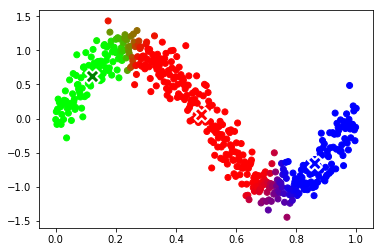

In [5]:
gmm = GaussianMixtureDistribution(n_component=3)
gmm.fit(x_train, iter_max=100)
joint_prob = gmm.joint_probability(x_train)

plt.scatter(x_train[:, 0], x_train[:, 1], c=joint_prob / np.sum(joint_prob, axis=1, keepdims=True))
plt.scatter(gmm.means[:, 0], gmm.means[:, 1], s=200, marker='X', lw=2, c=['red', 'green', 'blue'], edgecolor="white")
plt.show()